In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide
import os
from utils import *
import pandas as pd
import cartopy.feature as cfeature
import xesmf as xe
from scipy.ndimage import gaussian_filter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from palette import *
import statsmodels.api as sm


# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy


#datadir = './'
datadir = '/home7/pharos/othr/cgonzale/data/iwsst_mit/1month/'
datadir_out = '/home7/pharos/othr/cgonzale/data/iwsst_mit/working/'
graphdir = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/'
bathy = '/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc'
datadir_tides = '/home2/pharos/othr/aponte/tides/HRET/'
datadir_tides2 = '/home2/pharos/othr/aponte/tides/FES2014/'
# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

palette = '/home3/homedir7/perso/cgonzale/IWAVE/script/palette/medspiration.rgb'
csst = getColorMap( rgbFile = palette )

/home/lervily/cgonzale/miniconda3/envs/iwsst/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
matplotlib.rcParams.update({'font.size': 14})

### Semidiurnal 

In [44]:
file = 'fast_SST_semidiurnal.nc'
v_fast_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_SST_semidiurnal.nc'
v_slow_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})

In [38]:
toplt_zoom = v_fast_semi
print(v_slow_semi)

<xarray.Dataset>
Dimensions:        (i: 480, j: 492, time: 49)
Coordinates:
    face           int64 ...
  * i              (i) int64 2976 2977 2978 2979 2980 2981 2982 2983 2984 ...
  * j              (j) int64 2427 2428 2429 2430 2431 2432 2433 2434 2435 ...
    XC             (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    YC             (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    rA             (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    Depth          (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
  * time           (time) float64 1.372e+07 1.372e+07 1.372e+07 1.373e+07 ...
    iters          (time) int64 dask.array<shape=(49,), chunksize=(49,)>
Data variables:
    SST_slow_semi  (j, i, time) float64 dask.array<shape=(492, 480, 49), chunksize=(100, 480, 49)>


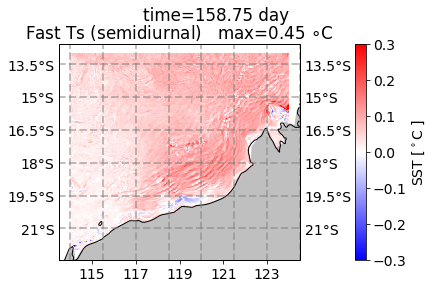

In [30]:
fig = plt.figure()
#plot wave SST
t0=0

pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(v_fast_semi.XC,v_fast_semi.YC,v_fast_semi.SST_fast_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'SST [$^\circ$C ]')
ax.set_title(r'Fast Ts (semidiurnal)   max=%.2f $\circ$C' %(np.abs(v_fast_semi.SST_fast_semi).max(skipna=True) ))
thour=(v_fast_semi.time[t0]/3600)
tday=(v_fast_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='Ts_fast_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_SST/Fast/'+figname
fig.savefig(frame, dpi=150)

In [31]:
Nt=v_fast_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_fast_semi.XC,v_fast_semi.YC,v_fast_semi.SST_fast_semi[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Fast Ts (semidiurnal)   max=%.2f $\circ$C' %(np.abs(v_fast_semi.SST_fast_semi).max(skipna=True) ))
    thour=(v_fast_semi.time[t0]/3600)
    tday=(v_fast_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_fast_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_SST/Fast/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)
    print('frame:',t0)

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48


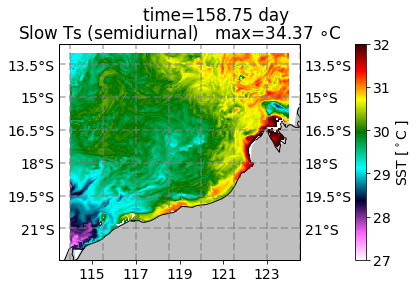

In [41]:
fig = plt.figure()
#plot wave SST
t0=0

pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(v_slow_semi.XC,v_slow_semi.YC,v_slow_semi.SST_slow_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap=csst,vmax=32, vmin=27)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'SST [$^\circ$C ]')
ax.set_title(r'Slow Ts (semidiurnal)   max=%.2f $\circ$C' %(np.abs(v_slow_semi.SST_slow_semi).max(skipna=True) ))
thour=(v_slow_semi.time[t0]/3600)
tday=(v_slow_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='Ts_slow_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_SST/Slow/'+figname
fig.savefig(frame, dpi=150)

In [43]:
Nt=v_slow_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_slow_semi.XC,v_slow_semi.YC,v_slow_semi.SST_slow_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap=csst,vmax=32, vmin=27)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    
    ax.set_title(r'Slow Ts (semidiurnal)   max=%.2f $\circ$C' %(np.abs(v_slow_semi.SST_slow_semi).max(skipna=True) ))
    thour=(v_slow_semi.time[t0]/3600)
    tday=(v_slow_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_slow_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_SST/Slow/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)
    print('frame:',t0)

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48


---

### Diurnal

In [45]:
file = 'fast_SST_diurnal.nc'
v_fast_diurnal = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_SST_diurnal.nc'
v_slow_diurnal = xr.open_dataset(datadir_out+file,chunks={'j':100})

In [46]:
print(v_fast_diurnal)

<xarray.Dataset>
Dimensions:           (i: 480, j: 492, time: 49)
Coordinates:
    face              int64 ...
  * i                 (i) int64 2976 2977 2978 2979 2980 2981 2982 2983 2984 ...
  * j                 (j) int64 2427 2428 2429 2430 2431 2432 2433 2434 2435 ...
    XC                (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    YC                (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    rA                (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    Depth             (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
  * time              (time) float64 1.372e+07 1.372e+07 1.372e+07 1.373e+07 ...
    iters             (time) int64 dask.array<shape=(49,), chunksize=(49,)>
Data variables:
    SST_fast_diurnal  (j, i, time) float64 dask.array<shape=(492, 480, 49), chunksize=(100, 480, 49)>


In [50]:
Nt=v_fast_diurnal.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_fast_diurnal.XC,v_fast_diurnal.YC,v_fast_diurnal.SST_fast_diurnal[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-0.6)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Fast Ts (diurnal)   max=%.2f $\circ$C' %(np.abs(v_fast_diurnal.SST_fast_diurnal).max(skipna=True) ))
    thour=(v_fast_diurnal.time[t0]/3600)
    tday=(v_fast_diurnal.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_fast_diurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Diurnal_SST/Fast/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)
    print('frame:',t0)

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48


In [51]:
Nt=v_slow_diurnal.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_slow_diurnal.XC,v_slow_diurnal.YC,v_slow_diurnal.SST_slow_diurnal[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap=csst,vmax=32,vmin=27)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Slow Ts (diurnal)   max=%.2f $\circ$C' %(np.abs(v_slow_diurnal.SST_slow_diurnal).max(skipna=True) ))
    thour=(v_slow_diurnal.time[t0]/3600)
    tday=(v_slow_diurnal.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_slow_diurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Diurnal_SST/Slow/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)
    print('frame:',t0)

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48


---

### Semidiurnal (diurnal corrected)

In [59]:
file = 'fast_SST_semi_diurnal_corrected.nc'
v_fast_semi_diurnal_corrected = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_SST_semi_diurnal_corrected.nc'
v_slow_semi_diurnal_corrected = xr.open_dataset(datadir_out+file,chunks={'j':100})

In [54]:
print(v_fast_semi_diurnal_corrected)

<xarray.Dataset>
Dimensions:                          (i: 480, j: 492, time: 49)
Coordinates:
    face                             int64 ...
  * i                                (i) int64 2976 2977 2978 2979 2980 2981 ...
  * j                                (j) int64 2427 2428 2429 2430 2431 2432 ...
    XC                               (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    YC                               (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    rA                               (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    Depth                            (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
  * time                             (time) float64 1.372e+07 1.372e+07 ...
    iters                            (time) int64 dask.array<shape=(49,), chunksize=(49,)>
Data variables:
    SST_fast_semi_diurnal_corrected  (j, i, time) float64 dask.array<shape=(492, 480, 49), chunksize=(

In [66]:
Nt=v_fast_semi_diurnal_corrected.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_fast_semi_diurnal_corrected.XC,v_fast_semi_diurnal_corrected.YC,v_fast_semi_diurnal_corrected.SST_fast_semi_diurnal_corrected[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Fast Ts (semi(corrected))    max=%.2f $\circ$C' %(np.abs(v_fast_semi_diurnal_corrected.SST_fast_semi_diurnal_corrected[:,:,t0]).max(skipna=True) ))
    thour=(v_fast_semi_diurnal_corrected.time[t0]/3600)
    tday=(v_fast_semi_diurnal_corrected.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_fast_diurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_SST_diurnal_corrected/Fast/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)


In [67]:
Nt=v_slow_semi_diurnal_corrected.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_slow_semi_diurnal_corrected.XC,v_slow_semi_diurnal_corrected.YC,v_slow_semi_diurnal_corrected.SST_slow_semi_diurnal_corrected[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.04, vmax=0.04)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Slow Ts (semi(corrected))    max=%.2f $\circ$C' %(np.abs(v_slow_semi_diurnal_corrected.SST_slow_semi_diurnal_corrected[:,:,t0]).max(skipna=True) ))
    thour=(v_slow_semi_diurnal_corrected.time[t0]/3600)
    tday=(v_slow_semi_diurnal_corrected.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_slow_diurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_SST_diurnal_corrected/Slow/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)


---

### Semidiurnal + diurnal 

In [3]:
file = 'fast_SST_diurnal_all.nc'
v_fast_diurnal_all = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'fast_SST_semi_all.nc'
v_fast_semi_all = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_SST_all.nc'
v_slow_all = xr.open_dataset(datadir_out+file,chunks={'j':100})

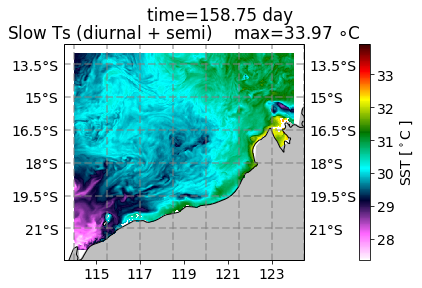

In [73]:
fig = plt.figure()
t0 = 0
#plot wave SST
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(v_slow_all.XC,v_slow_all.YC,v_slow_all.SST_slow_all[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap=csst)#,vmin = -0.04, vmax=0.04)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'SST [$^\circ$C ]')
ax.set_title(r'Slow Ts (diurnal + semi)    max=%.2f $\circ$C' %(np.abs(v_slow_all.SST_slow_all[:,:,t0]).max(skipna=True) ))
thour=(v_slow_all.time[t0]/3600)
tday=(v_slow_all.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='Ts_slow_all_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/SST_semi_diurnal_all/Slow/'+figname
fig.savefig(frame, dpi=150)


In [74]:
Nt=v_slow_all.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_slow_all.XC,v_slow_all.YC,v_slow_all.SST_slow_all[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap=csst,vmin = 27, vmax= 32)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Slow Ts (diurnal + semi)    max=%.2f $\circ$C' %(np.abs(v_slow_all.SST_slow_all[:,:,t0]).max(skipna=True) ))
    thour=(v_slow_all.time[t0]/3600)
    tday=(v_slow_all.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_slow_all_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/SST_semi_diurnal_all/Slow/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)

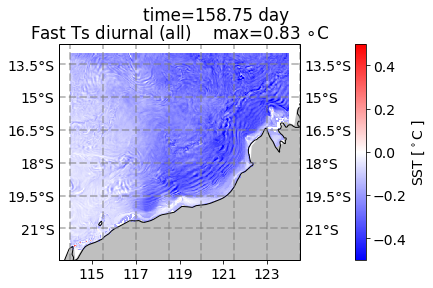

In [78]:
fig = plt.figure()
t0=0
#plot wave SST
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(v_fast_diurnal_all.XC,v_fast_diurnal_all.YC,v_fast_diurnal_all.SST_fast_diurnal_all[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.5, vmax= 0.5)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'SST [$^\circ$C ]')
ax.set_title(r'Fast Ts diurnal (all)    max=%.2f $\circ$C' %(np.abs(v_fast_diurnal_all.SST_fast_diurnal_all[:,:,t0]).max(skipna=True) ))
thour=(v_fast_diurnal_all.time[t0]/3600)
tday=(v_fast_diurnal_all.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='Ts_fast_diurnal_all_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/SST_semi_diurnal_all/Fast_diurnal_all/'+figname
fig.savefig(frame, dpi=150)

In [5]:
Nt=v_fast_diurnal_all.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_fast_diurnal_all.XC,v_fast_diurnal_all.YC,v_fast_diurnal_all.SST_fast_diurnal_all[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.5, vmax= 0.5)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Fast Ts diurnal (all)    max=%.2f $\circ$C' %(np.abs(v_fast_diurnal_all.SST_fast_diurnal_all[:,:,t0]).max(skipna=True) ))
    thour=(v_fast_diurnal_all.time[t0]/3600)
    tday=(v_fast_diurnal_all.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_fast_diurnal_all_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/SST_semi_diurnal_all/Fast_diurnal_all/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)

In [1]:
fig = plt.figure()
t0=0
#plot wave SST
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(v_fast_semi_all.XC,v_fast_semi_all.YC,v_fast_semi_all.SST_fast_semi_all[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.3, vmax= 0.3)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'SST [$^\circ$C ]')
ax.set_title(r'Fast Ts semi (all)    max=%.2f $\circ$C' %(np.abs(v_fast_semi_all.SST_fast_semi_all[:,:,t0]).max(skipna=True) ))
thour=(v_fast_semi_all.time[t0]/3600)
tday=(v_fast_semi_all.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='Ts_fast_semi_all_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/SST_semi_diurnal_all/Fast_semi_all/'+figname
fig.savefig(frame, dpi=150)

NameError: name 'plt' is not defined

In [82]:
Nt=v_fast_semi_all.time.size
for t0 in range(Nt):
    fig = plt.figure()

    #plot wave SST
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(v_fast_semi_all.XC,v_fast_semi_all.YC,v_fast_semi_all.SST_fast_semi_all[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.3, vmax= 0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'SST [$^\circ$C ]')
    ax.set_title(r'Fast Ts semi (all)    max=%.2f $\circ$C' %(np.abs(v_fast_semi_all.SST_fast_semi_all[:,:,t0]).max(skipna=True) ))
    thour=(v_fast_semi_all.time[t0]/3600)
    tday=(v_fast_semi_all.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='Ts_fast_semi_all_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/SST_semi_diurnal_all/Fast_semi_all/'+figname
    fig.savefig(frame, dpi=150)
    plt.close(fig)